In [1]:

# TODO: To plot the results for script 'snr_ts_sub_test2.py'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

In [3]:
def get_chirp_mass(m1, m2):
    '''Calculate chirp mass'''
    chrp_mass = ((m1*m2)**(3/5))/((m1 + m2)**(1/5))
    return chrp_mass

cmass1_inj_arr, cmass1_rec_arr, cmass1_bestrec_arr = [], [], []
cmass2_inj_arr, cmass2_rec_arr, cmass2_bestrec_arr = [], [], []
besttemp_tc1_arr, besttemp_tc2_arr = [], []
rec_tc1_arr, rec_tc2_arr = [], []
inj_snr1_arr, inj_snr2_arr = [], []
rec_snr1_arr, rec_snr2_arr = [], []
buffer_arr = []

for idx in range(1500):
    cmass1_rec, cmass2_rec = [], []
    rec_tc1, rec_tc2 = [], []
    rec_snr1, rec_snr2 = [], []

    data = pd.read_csv(f"/Users/sudhirgholap/Documents/Overlapping_signals/snr_ts_sub_alg2/sub_alg_{idx}.csv")

    if abs(data['time'][0] - data['time'][1]) <= 1.1*data['buffer'][0]:
        cmass1_inj_arr.append(get_chirp_mass(data['m1_inj1'][0], data['m2_inj1'][0]))
        cmass2_inj_arr.append(get_chirp_mass(data['m1_inj2'][0], data['m2_inj2'][0]))

        cmass1_bestrec_arr.append(get_chirp_mass(data['m1_best_rec1'][0], data['m2_best_rec1'][0]))
        cmass2_bestrec_arr.append(get_chirp_mass(data['m1_best_rec2'][0], data['m2_best_rec2'][0]))

        besttemp_tc1_arr.append(data['best_temp_tc1'][0])
        besttemp_tc2_arr.append(data['best_temp_tc2'][0])

        inj_snr1_arr.append(data['snr1'][0])
        inj_snr2_arr.append(data['snr2'][0])

        buffer_arr.append(data['buffer'][0])
        
        for i in range(5):
            cmass1_rec.append(get_chirp_mass(data['m1_rec'][2*i], data['m2_rec'][2*i]))
            cmass2_rec.append(get_chirp_mass(data['m1_rec'][2*i + 1], data['m2_rec'][2*i + 1]))

            rec_tc1.append(data['time'][2*i])
            rec_tc2.append(data['time'][2*i + 1])

            rec_snr1.append(data['snr_rec'][2*i])
            rec_snr2.append(data['snr_rec'][2*i + 1])

        cmass1_rec_arr.append(cmass1_rec)
        cmass2_rec_arr.append(cmass2_rec)

        rec_tc1_arr.append(rec_tc1)
        rec_tc2_arr.append(rec_tc2)

        rec_snr1_arr.append(rec_snr1)
        rec_snr2_arr.append(rec_snr2)
        
    else:
        continue

In [4]:
delta_cmass1_arr, delta_cmass2_arr = [], []
delta_tc1_arr, delta_tc2_arr = [], []

for i in range(len(buffer_arr)):
    delta_cmass1, delta_cmass2 = [], []
    delta_tc1, delta_tc2 = [], []

    for j in range(5):
        delta_cmass1.append(cmass1_bestrec_arr[i] - cmass1_rec_arr[i][j])
        delta_cmass2.append(cmass2_bestrec_arr[i] - cmass2_rec_arr[i][j])

        delta_tc1.append(besttemp_tc1_arr[i] - rec_tc1_arr[i][j])
        delta_tc2.append(besttemp_tc2_arr[i] - rec_tc2_arr[i][j])

    delta_cmass1_arr.append(delta_cmass1)
    delta_cmass2_arr.append(delta_cmass2)

    delta_tc1_arr.append(delta_tc1)
    delta_tc2_arr.append(delta_tc2)


/var/folders/z2/2wcrxzpn0nq9bm85q8_t1bfm0000gn/T/ipykernel_6779/4249375963.py:15: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(cmap)


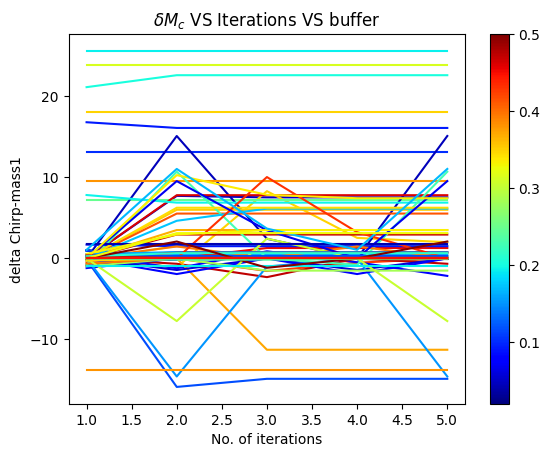

In [5]:
n_lines = len(buffer_arr)
x = np.linspace(1, 5, 5)
# c = np.arange(1, n_lines + 1)
buffer_arr = np.array(buffer_arr)
c = buffer_arr

norm = mpl.colors.Normalize(vmin=c.min(), vmax=c.max())
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.jet)
cmap.set_array([])

fig, ax = plt.subplots(dpi=100)
for i, delta_cmass1 in enumerate(np.array(delta_cmass1_arr[:100])):
    ax.plot(x, delta_cmass1, c=cmap.to_rgba(buffer_arr[[i]]))

fig.colorbar(cmap)
plt.title('$\delta M_c$ VS Iterations VS buffer ')
plt.xlabel('No. of iterations')
plt.ylabel('delta Chirp-mass1')
plt.show()


/var/folders/z2/2wcrxzpn0nq9bm85q8_t1bfm0000gn/T/ipykernel_6779/183184616.py:15: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(cmap)


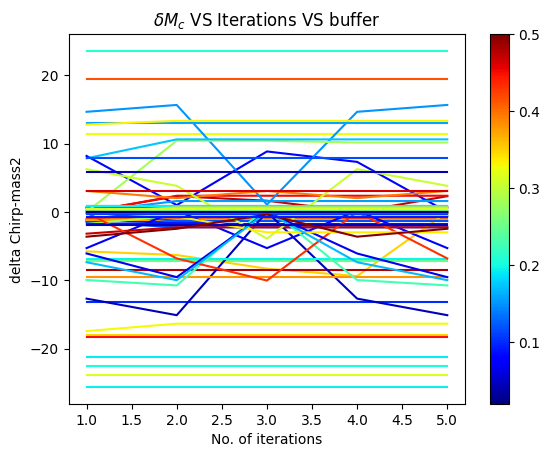

In [6]:
n_lines = len(buffer_arr)
x = np.linspace(1, 5, 5)
# c = np.arange(1, n_lines + 1)
buffer_arr = np.array(buffer_arr)
c = buffer_arr

norm = mpl.colors.Normalize(vmin=c.min(), vmax=c.max())
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.jet)
cmap.set_array([])

fig, ax = plt.subplots(dpi=100)
for i, delta_cmass2 in enumerate(np.array(delta_cmass2_arr[:100])):
    ax.plot(x, delta_cmass2, c=cmap.to_rgba(buffer_arr[[i]]))

fig.colorbar(cmap)
plt.title('$\delta M_c$ VS Iterations VS buffer ')
plt.xlabel('No. of iterations')
plt.ylabel('delta Chirp-mass2')
plt.show()

13.694
12.894
14.443
12.856
10.974
14.743
12.499
14.229
13.171
12.151
12.467
13.865
14.852
10.673
12.948
13.985
12.845
8.964
14.635
11.816
12.418
14.193
10.721
12.191
14.033
12.259
10.574
10.081
10.368
14.804
13.386
14.838
13.073
10.531
14.092
12.347
13.517
14.456
11.263
10.388
10.106
13.892
12.582
10.319
10.272
12.805
11.62
14.429
13.077


/var/folders/z2/2wcrxzpn0nq9bm85q8_t1bfm0000gn/T/ipykernel_6779/1314044726.py:27: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(cmap)


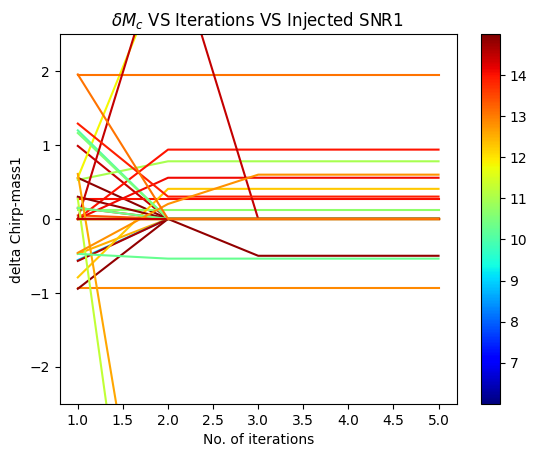

In [12]:
cmass_low = 25
cmass_high = 40
buffer_low = 0.1
buffer_high = 0.2
snr1_low = 8
snr2_low = 8

n_lines = len(buffer_arr)
x = np.linspace(1, 5, 5)
# c = np.arange(1, n_lines + 1)
inj_snr1_arr = np.array(inj_snr1_arr)
c = inj_snr1_arr

norm = mpl.colors.Normalize(vmin=c.min(), vmax=c.max())
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.jet)
cmap.set_array([])

idx = np.where((buffer_low <= (buffer_arr)) & ((buffer_arr) <= buffer_high) & (cmass_low <= np.array(cmass1_inj_arr)) & 
               (np.array(cmass1_inj_arr) <= cmass_high) & (cmass_low <= np.array(cmass2_inj_arr)) & 
               (np.array(cmass2_inj_arr) <= cmass_high) & (np.array(inj_snr1_arr) >= snr1_low) & (np.array(inj_snr2_arr) >= snr2_low))[0]
type(idx)
fig, ax = plt.subplots(dpi=100)
for i, delta_cmass1 in enumerate(np.array(delta_cmass1_arr)[idx]):
    ax.plot(x, delta_cmass1, c=cmap.to_rgba(inj_snr1_arr[idx[i]]))
    print(inj_snr1_arr[idx[i]])

fig.colorbar(cmap)
plt.title('$\delta M_c$ VS Iterations VS Injected SNR1 ')
plt.xlabel('No. of iterations')
plt.ylabel('delta Chirp-mass1')
plt.ylim(-2.5, 2.5)
plt.show()


In [ ]:
n_lines = len(buffer_arr)
x = np.linspace(1, 5, 5)
# c = np.arange(1, n_lines + 1)
inj_snr2_arr = np.array(inj_snr2_arr)
c = inj_snr2_arr

norm = mpl.colors.Normalize(vmin=c.min(), vmax=c.max())
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.jet)
cmap.set_array([])

fig, ax = plt.subplots(dpi=100)
for i, delta_cmass2 in enumerate(np.array(delta_cmass2_arr[:100])):
    ax.plot(x, delta_cmass2, c=cmap.to_rgba(inj_snr2_arr[[i]]))

fig.colorbar(cmap)
plt.title('$\delta M_c$ VS Iterations VS Injected SNR2 ')
plt.xlabel('No. of iterations')
plt.ylabel('delta Chirp-mass2')
plt.show()


In [ ]:
n_lines = len(buffer_arr)
x = np.linspace(1, 5, 5)
# c = np.arange(1, n_lines + 1)
buffer_arr = np.array(buffer_arr)
c = buffer_arr

norm = mpl.colors.Normalize(vmin=c.min(), vmax=c.max())
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.jet)
cmap.set_array([])

fig, ax = plt.subplots(dpi=100)
for i, delta_tc1 in enumerate(np.array(delta_tc1_arr)):
    ax.plot(x, delta_tc1, c=cmap.to_rgba(buffer_arr[[i]]))

fig.colorbar(cmap)
plt.xlabel('No. of iterations')
plt.ylabel('delta tc1')
plt.show()


In [ ]:
n_lines = len(buffer_arr)
x = np.linspace(1, 5, 5)
# c = np.arange(1, n_lines + 1)
buffer_arr = np.array(buffer_arr)
c = buffer_arr

norm = mpl.colors.Normalize(vmin=c.min(), vmax=c.max())
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.jet)
cmap.set_array([])

fig, ax = plt.subplots(dpi=100)
for i, delta_tc2 in enumerate(np.array(delta_tc2_arr[:500])):
    ax.plot(x, delta_tc2, c=cmap.to_rgba(buffer_arr[[i]]))

fig.colorbar(cmap)
plt.xlabel('No. of iterations')
plt.ylabel('delta tc2')
plt.show()


In [ ]:
idx_arr = []

for i, delta_tc1 in enumerate(np.array(delta_tc1_arr)):
    if abs(delta_tc1[4]) >= 1:
        idx_arr.append(i)
        print(i, delta_tc1[4], cmass1_inj_arr[i], cmass2_inj_arr[i], inj_snr1_arr[i], inj_snr2_arr[i], buffer_arr[i])
print(len(idx_arr))

In [ ]:
delta_tc1_arr